100%|██████████| 800/800 [12:36<00:00,  1.08it/s]


tensor(-626.5742)
[tensor(-973.9406), tensor(-1123.4033), tensor(-908.1449), tensor(-865.7638), tensor(-766.7687), tensor(-1148.9015), tensor(-953.9261), tensor(-1045.2198), tensor(-1065.8288), tensor(-967.8054), tensor(-943.6269), tensor(-765.4427), tensor(-793.0768), tensor(-984.6796), tensor(-872.8189), tensor(-846.2571), tensor(-886.6876), tensor(-882.2169), tensor(-868.5039), tensor(-873.7521), tensor(-888.7396), tensor(-986.5267), tensor(-756.5551), tensor(-879.5441), tensor(-902.6722), tensor(-1106.6335), tensor(-1083.8789), tensor(-860.3303), tensor(-1055.0762), tensor(-837.3168), tensor(-980.7475), tensor(-716.3490), tensor(-847.4280), tensor(-1019.4410), tensor(-1010.3055), tensor(-1047.4717), tensor(-805.4469), tensor(-1060.7638), tensor(-845.9313), tensor(-851.0550), tensor(-1082.1460), tensor(-980.6609), tensor(-987.6070), tensor(-1040.7480), tensor(-857.0233), tensor(-1034.7102), tensor(-827.5696), tensor(-956.2480), tensor(-914.3732), tensor(-989.4966), tensor(-891.5404)

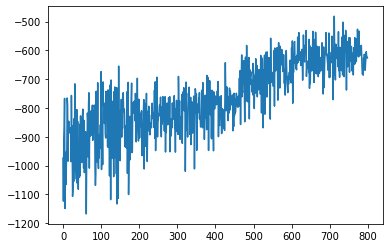

In [1]:
import torch.nn as nn
from seagul.rl.algos.ppo import ppo
from seagul.rl.models import PPOModel
from seagul.nn import MLP, CategoricalMLP
import torch
import gym



import matplotlib.pyplot as plt
%matplotlib inline
import seagul.envs

torch.set_default_dtype(torch.double)
env_name= "Pendulum-v0"

input_size = 3
output_size = 1
layer_size = 12
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PPOModel(policy, value_fn, action_var=.7, discrete=False)

# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_model, rewards, var_dict = ppo(env_name, 
                                800, 
                                model, 
                                action_var_schedule = [.7],
                                env_timesteps = 150,
                                epoch_batch_size=512,
                                gamma=0.99,
                                lam=0.99,
                                eps=0.2,
                                seed=0,
                                policy_batch_size=512,
                                value_batch_size=512,
                                policy_lr=1e-4,
                                value_lr=1e-3,
                                p_epochs=32,
                                v_epochs=32,
                                use_gpu=False,
                                reward_stop=None)
print(rewards)
plt.plot(rewards)

locals().update(var_dict)

100%|██████████| 600000/600000.0 [17:59<00:00, 576.13it/s]


tensor([-1182.1254])


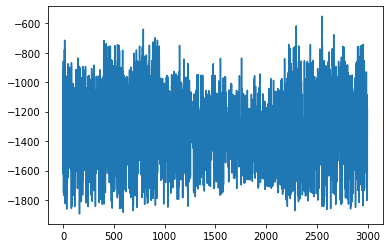

In [6]:
import torch.nn as nn
from seagul.rl.algos.ppo2 import ppo
from seagul.rl.models import PPOModel
from seagul.nn import MLP, CategoricalMLP
import torch
import gym


import matplotlib.pyplot as plt
%matplotlib inline
import seagul.envs

torch.set_default_dtype(torch.double)
env_name= "Pendulum-v0"

input_size = 3
output_size = 1
layer_size = 12
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PPOModel(policy, value_fn, action_var=.7, discrete=False)

# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_model, rewards, var_dict = ppo(env_name, 
                                6e5, 
                                model, 
                                act_var_schedule = [.7],
                                epoch_batch_size=512,
                                gamma=0.99,
                                lam=0.99,
                                eps=0.2,
                                seed=0,
                                policy_batch_size=512,
                                value_batch_size=512,
                                policy_lr=1e-4,
                                value_lr=1e-3,
                                p_epochs=32,
                                v_epochs=32,
                                use_gpu=False,
                                reward_stop=None)
print(rewards[-1])
plt.plot(rewards)

locals().update(var_dict)


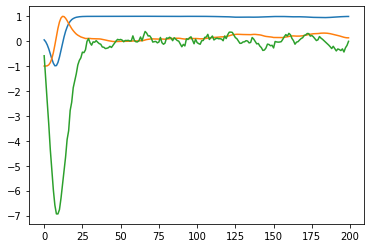

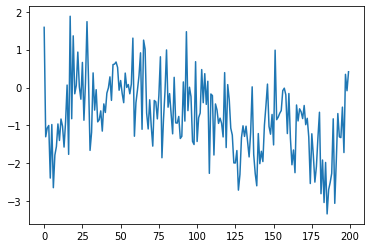

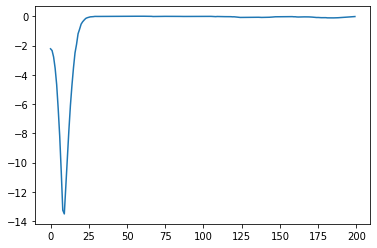

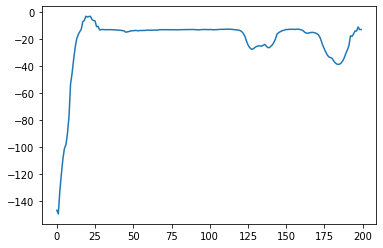

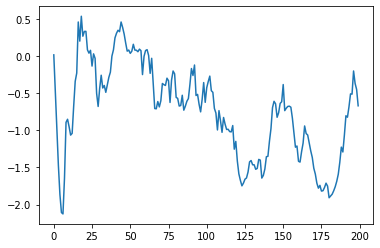

In [8]:
env = gym.make(env_name)

done = False
obs = env.reset()

obs_list = []
act_list = []
rew_list = []
avg_list = []
val_list = []

while not done:
    act, val, _ ,_ = model.step(obs)
    obs,rew,done,_ = env.step(act.reshape(-1))
    avg = model.policy(torch.as_tensor(obs))
    
    obs_list.append(obs)
    act_list.append(act)
    rew_list.append(rew)
    avg_list.append(avg)
    val_list.append(val)
    
plt.plot(obs_list)
plt.figure()
plt.plot(act_list)
plt.figure()
plt.plot(rew_list)
plt.figure()
plt.plot(val_list)
plt.figure()
plt.plot(avg_list)
    

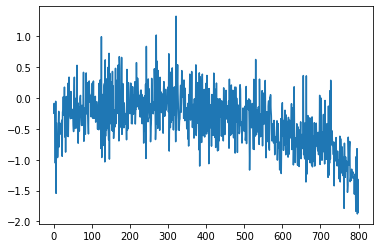

In [9]:
plt.plot(p_loss_hist)

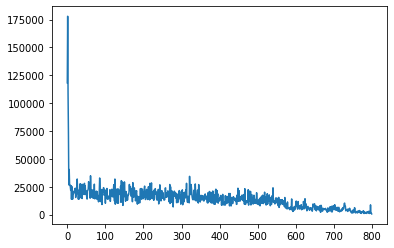

In [10]:
plt.plot(v_loss_hist)

tensor([[-0.2771],
        [-0.1761],
        [ 0.2044],
        [-0.2904],
        [ 0.2393],
        [ 0.1995],
        [-0.3802],
        [ 0.2611],
        [-0.0807],
        [ 0.1831],
        [-0.0456],
        [-0.2770],
        [-0.2376],
        [ 0.2483],
        [-0.2651],
        [-0.2812],
        [-0.4157],
        [-0.1721],
        [-0.0799],
        [ 0.2678],
        [ 0.1749],
        [-0.3512],
        [ 0.0840],
        [ 0.2557],
        [-0.3298],
        [-0.3360],
        [ 0.1450],
        [-0.3858],
        [ 0.0137],
        [-0.2809],
        [-0.3160],
        [-0.2706],
        [-0.1999],
        [-0.2210],
        [ 0.1554],
        [ 0.2057],
        [-0.3150],
        [-0.2587],
        [-0.3934],
        [-0.2940],
        [-0.2726],
        [-0.3415],
        [ 0.2247],
        [ 0.2713],
        [-0.1050],
        [ 0.2342],
        [ 0.0138],
        [ 0.2522],
        [ 0.2611],
        [ 0.1631],
        [ 0.2380],
        [ 0.2645],
        [ 0.